# Question 1

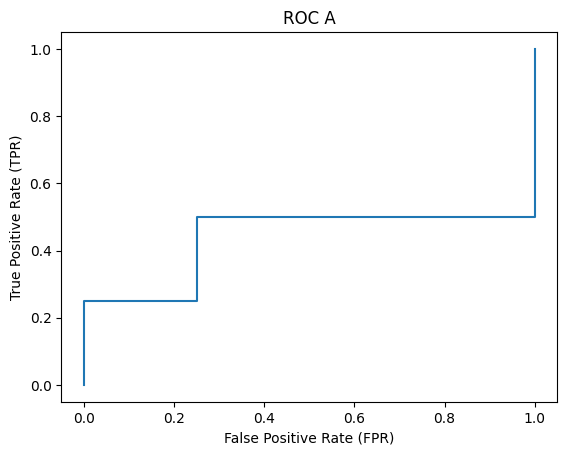

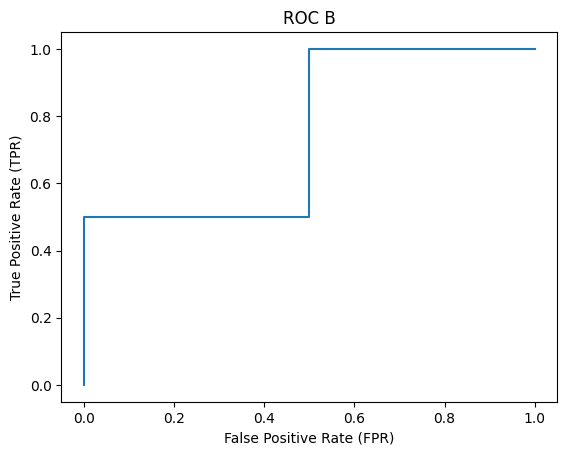

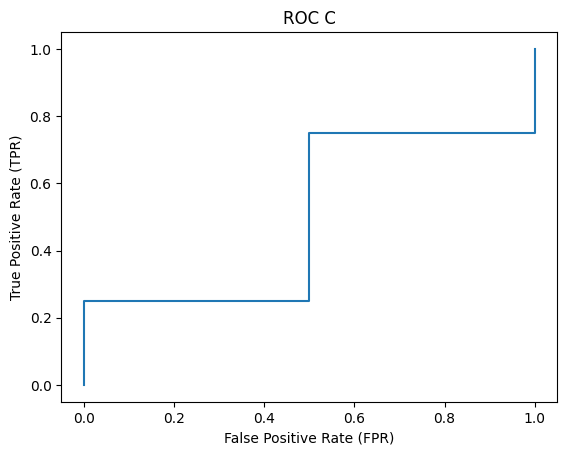

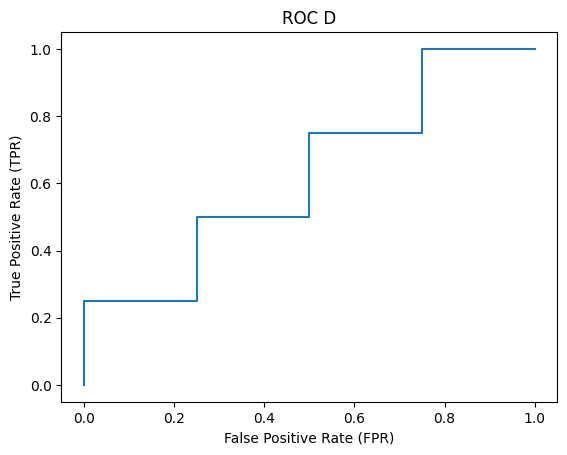

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ROC_plot(x, y, label, threshold=[0, 1]):
    # Lists to store True Positive Rate (TPR) and False Positive Rate (FPR) values.
    tpr_values = []
    fpr_values = []
    
    for theta in [threshold[0]] + x + [threshold[1]]:
    # Convert probabilities to binary predictions based on the threshold.
        binary_predictions = (np.array(x) > theta).astype(int)
        
        # Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).
        TP = np.sum((binary_predictions == y) & (binary_predictions == 1))
        FP = np.sum((binary_predictions != y) & (binary_predictions == 1))
        TN = np.sum((binary_predictions == y) & (binary_predictions == 0))
        FN = np.sum((binary_predictions != y) & (binary_predictions == 0))

        # Calculate the True Positive Rate (TPR) and the False Positive Rate (FPR).
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

        # Append the True Positive Rate (TPR) and the False Positive Rate (FPR) values to the lists.
        tpr_values.append(TPR)
        fpr_values.append(FPR)
    
    # Create a DataFrame to store the True Positive Rate (TPR) and the False Positive Rate (FPR) values.
    rates = pd.DataFrame({'FPR': fpr_values, 'TPR': tpr_values})

    # Plotting the ROC curve with the given label.
    plt.plot(rates['FPR'], rates['TPR'])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(label)
    plt.show()


x = [0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.9, 0.95]

Y = [
    [1, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 1, 0, 0, 1, 1],
    [1, 0, 0, 1, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1],
    ]

# Labels for ROC curves
roc_labels = ['ROC A', 'ROC B', 'ROC C', 'ROC D']

# Generate separate ROC plots for each set of data with labels.
for i, y in enumerate(Y):
    ROC_plot(x, y, label=roc_labels[i])


# Question 6

In [5]:
import numpy as np

# Calculates y_k.
def y_k(b1, b2):
    return [1, b1, b2]

# Weight vectors for the assignment.
w1 = [1.2, -2.1, 3.2]
w2 = [1.2, -1.7, 2.9]
w3 = [1.3, -1.1, 2.2]
W = [w1, w2, w3]

# Bias vectors.
B = [
    [-1.4, 2.6], 
    [-0.6, -1.6], 
    [2.1, 5.0], 
    [0.7, 3.8]
    ]

# Store the probability for class 4 for each observation.
class_4_probs = {}

# Calculate the probabilities for each observation.
for i, b in enumerate(B):
    PCD = np.array(y_k(*b))
    y_hat = lambda w: np.dot(PCD, np.array(w).T)
    y_hats = [np.exp(y_hat(w)) for w in W]

    print(f"Observation {i+1}")

    # Calculate probabilities for classes 1 to 3.
    probabilities = [y_hat / (1 + sum(y_hats)) for y_hat in y_hats]
    for k, probability in enumerate(probabilities, start=1):
        print(f"P(y={k}|y_hat) = {probability:.2%}")

    # Calculate the probability for class 4.
    probability_4 = 1 / (1 + sum(y_hats))
    print(f"P(y=4|y_hat) = {probability_4:.2%}")
    
    # Store the probability for class 4.
    class_4_probs[i] = probability_4
    
    print('-' * 30)

# The highest probability for class 4.
max_class_4_observation = max(class_4_probs, key=class_4_probs.get)
max_probability = class_4_probs[max_class_4_observation]

# The observation with the highest probability for class 4.
print(f"Observation {max_class_4_observation + 1} has the highest probability for class 4: {max_probability:.2%}")


Observation 1
P(y=1|y_hat) = 78.00%
P(y=2|y_hat) = 20.42%
P(y=3|y_hat) = 1.58%
P(y=4|y_hat) = 0.00%
------------------------------
Observation 2
P(y=1|y_hat) = 5.11%
P(y=2|y_hat) = 6.50%
P(y=3|y_hat) = 15.35%
P(y=4|y_hat) = 73.05%
------------------------------
Observation 3
P(y=1|y_hat) = 63.38%
P(y=2|y_hat) = 32.76%
P(y=3|y_hat) = 3.85%
P(y=4|y_hat) = 0.00%
------------------------------
Observation 4
P(y=1|y_hat) = 67.89%
P(y=2|y_hat) = 28.73%
P(y=3|y_hat) = 3.38%
P(y=4|y_hat) = 0.00%
------------------------------
Observation 2 has the highest probability for class 4: 73.05%
